# Build an Autoencoders deep neural network model for solving any specific problems. The task and dataset you may decide for which build a model.

In [37]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import Model
from keras.layers import Dense,Input,Dropout
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers

In [38]:
%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=10,6
RANDOM_SEED=42
LABELS=['Severity','Non Severity']

In [39]:
df=pd.read_csv('Diseases (1).csv')
df.head()

,Tiredness,Dry-Cough,Sore-Throat,Age_0-9,Severity,Non Severity
0,1,1,1,1,0,0
1,1,1,1,1,0,0
2,1,1,1,1,0,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0


In [40]:
df.shape

(316800, 6)

In [41]:
df.isna().sum()

Tiredness       0
Dry-Cough       0
Sore-Throat     0
Age_0-9         0
Severity        0
Non Severity    0
dtype: int64

In [42]:
xtrain,xtest=train_test_split(df,test_size=0.2,random_state=RANDOM_SEED)

In [43]:
input_dim=xtrain.shape[1]
encoding_dim=14

In [44]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim,activation='tanh',
              activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder=Dense(int(encoding_dim/2),activation='relu')(encoder)
decoder=Dense(int(encoding_dim/2),activation='tanh')(encoder)
decoder=Dense(input_dim,activation='relu')(decoder)
autoencoder=Model(inputs=input_layer,outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_8 (Dense)             (None, 14)                98        
                                                                 
 dense_9 (Dense)             (None, 7)                 105       
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 6)                 48        
                                                                 
Total params: 307 (1.20 KB)
Trainable params: 307 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
nb_epoch=30
batch_size=32
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer=ModelCheckpoint(filepath='model_ae.h5',
                             verbose=0,
                             save_best_only=True)

tensorboard=TensorBoard(log_dir='./logs',
                        histogram_freq=0,
                        write_graph=True,
                        write_images=True)

history=autoencoder.fit(xtrain,xtrain,
                       epochs=nb_epoch,
                       batch_size=batch_size,
                       shuffle=True,
                       validation_data=(xtest,xtest),
                       verbose=1,
                       callbacks=[checkpointer,tensorboard]).history


Epoch 1/30
7920/7920 [==============================] - 23s 3ms/step - loss: 0.0047 - accuracy: 0.5636 - val_loss: 2.3561e-04 - val_accuracy: 0.4867
Epoch 2/30
  58/7920 [..............................] - ETA: 21s - loss: 2.3146e-04 - accuracy: 0.5523

C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7920/7920 [==============================] - 22s 3ms/step - loss: 1.4333e-04 - accuracy: 0.5850 - val_loss: 9.1089e-05 - val_accuracy: 0.3855
Epoch 3/30
7920/7920 [==============================] - 22s 3ms/step - loss: 7.6015e-05 - accuracy: 0.6053 - val_loss: 6.2378e-05 - val_accuracy: 0.4445
Epoch 4/30
7920/7920 [==============================] - 22s 3ms/step - loss: 5.6659e-05 - accuracy: 0.6054 - val_loss: 5.9905e-05 - val_accuracy: 0.5506
Epoch 5/30
7920/7920 [==============================] - 22s 3ms/step - loss: 4.7379e-05 - accuracy: 0.6010 - val_loss: 3.8221e-05 - val_accuracy: 0.3822
Epoch 6/30
7920/7920 [==============================] - 22s 3ms/step - loss: 4.0735e-05 - accuracy: 0.5955 - val_loss: 3.2168e-05 - val_accuracy: 0.8256
Epoch 7/30
7920/7920 [==============================] - 22s 3ms/step - loss: 3.7464e-05 - accuracy: 0.5940 - val_loss: 4.2790e-05 - val_accuracy: 0.5989
Epoch 8/30
7920/7920 [==============================] - 21s 3ms/step - loss: 3.5176e-05 - acc

In [46]:
from keras.models import load_model
autoencoder=load_model('model_ae.h5')

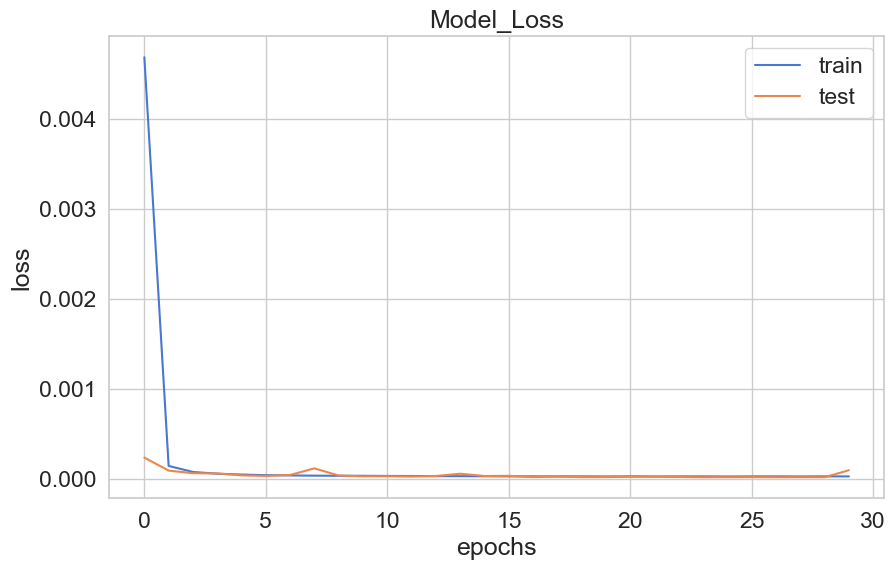

In [47]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')

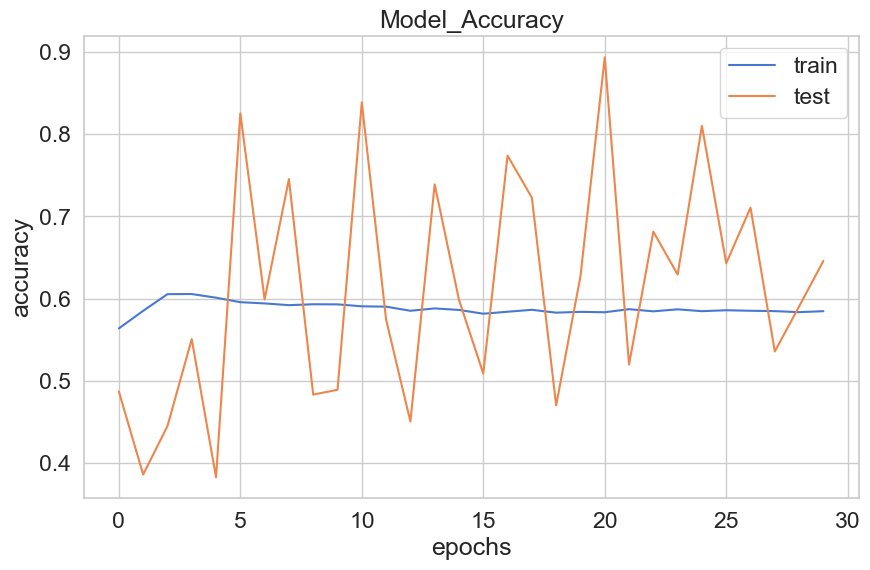

In [48]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')

In [49]:
predictions=autoencoder.predict(xtest)

1980/1980 [==============================] - 3s 2ms/step


In [50]:
xtest.shape

(63360, 6)

In [52]:
predictions.shape

(63360, 6)

In [53]:
mse=np.mean(np.power(xtest-predictions,2),axis=1)
error_df=pd.DataFrame({'Reconstruction_error':mse,'Severity':ytest})

In [54]:
error_df

,Reconstruction_error,Severity
277936,3.719178e-06,1
193502,3.297656e-07,0
92446,8.882718e-07,0
117607,4.668777e-09,0
240924,1.221612e-07,0
...,...,...
122340,6.472428e-07,0
151370,4.668777e-09,0
288434,3.297656e-07,0
1619,8.279470e-06,0


In [55]:
error_df.describe()

,Reconstruction_error,Severity
count,6.336000e+04,63360.000000
mean,7.558944e-07,0.251089
std,1.258080e-06,0.433643
min,0.000000e+00,0.000000
25%,9.358549e-08,0.000000
50%,3.349555e-07,0.000000
75%,8.882718e-07,1.000000
max,9.915308e-06,1.000000


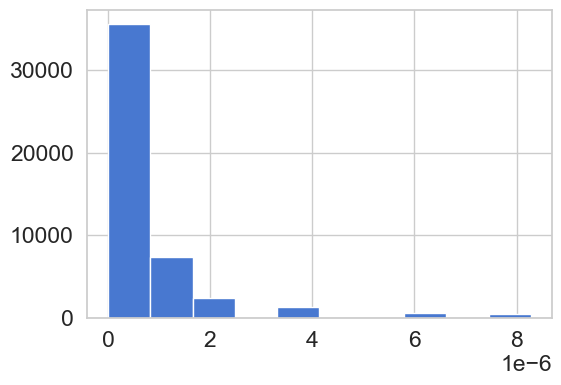

In [56]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
normal_error_df=error_df[(error_df['Severity']==0) & (error_df['Reconstruction_error']<1000)]
_=ax.hist(normal_error_df.Reconstruction_error.values,bins=10)

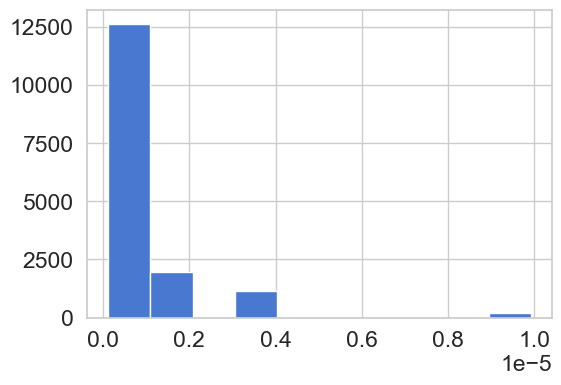

In [57]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
fraud_error_df=error_df[(error_df['Severity']==1)]
_=ax.hist(fraud_error_df.Reconstruction_error.values,bins=10)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve,auc,roc_curve,recall_score,f1_score
from sklearn.metrics import precision_recall_fscore_support

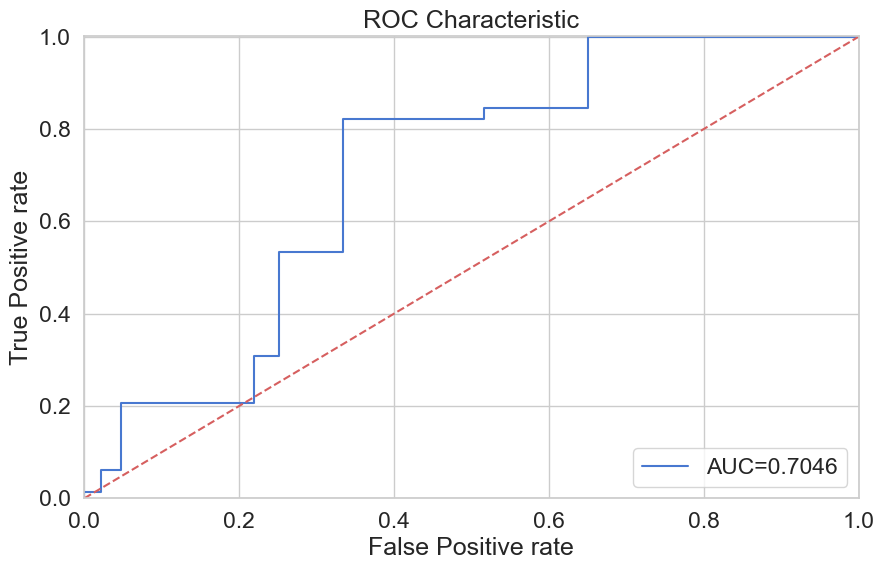

In [59]:
fpr,tpr,thresholds=roc_curve(error_df.Severity,error_df.Reconstruction_error)
roc_auc=auc(fpr,tpr)
plt.title('ROC Characteristic')
plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

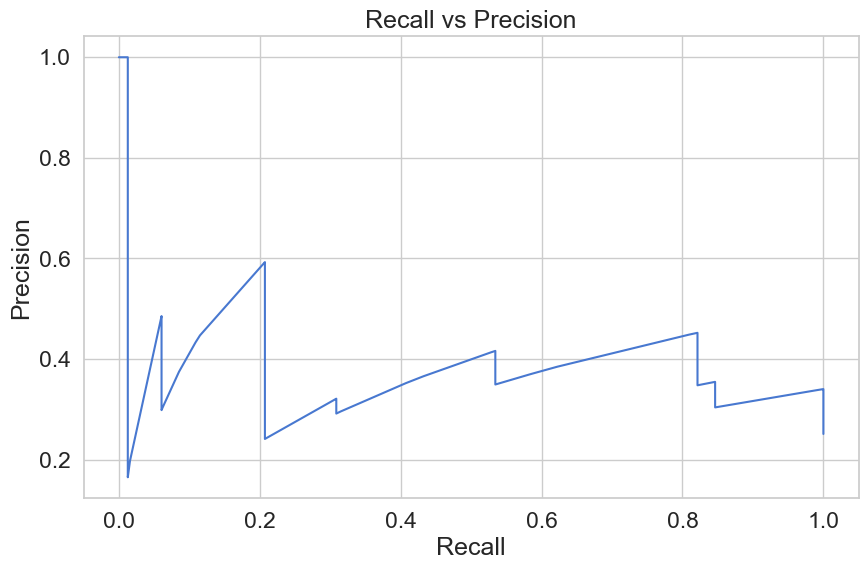

In [60]:
precision,recall,th=precision_recall_curve(error_df.Severity,error_df.Reconstruction_error)
plt.plot(recall,precision,'b',label='precision-recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

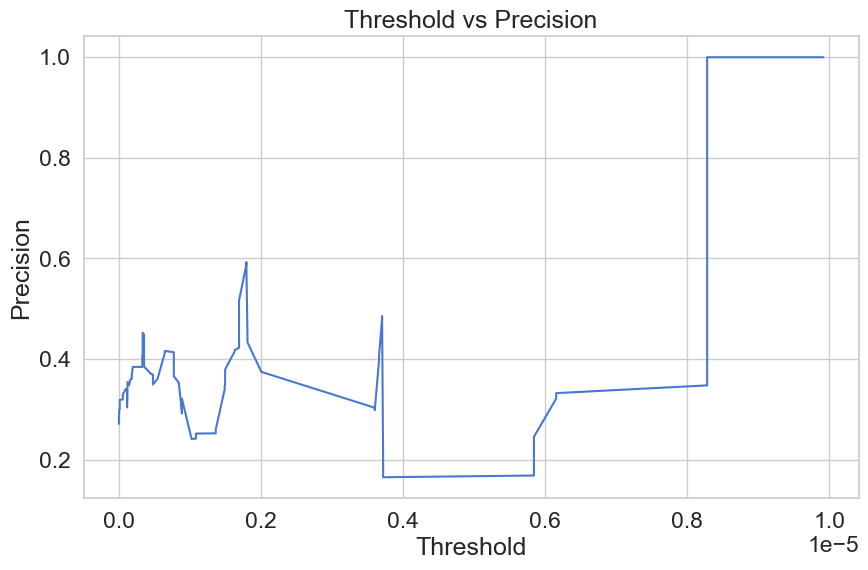

In [61]:
precision,recall,th=precision_recall_curve(error_df.Severity,error_df.Reconstruction_error)
plt.plot(th,precision[1:],'b',label='Threshold-precision curve')
plt.title('Threshold vs Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

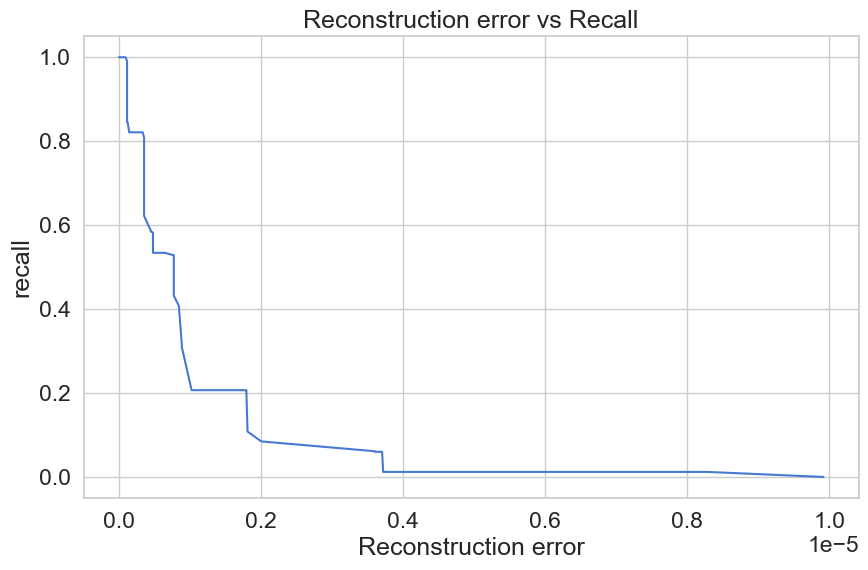

In [62]:
plt.plot(th,recall[1:],'b',label='Threshold-recall curve')
plt.title('Reconstruction error vs Recall')
plt.xlabel('Reconstruction error')
plt.ylabel('recall')
plt.show()

In [63]:
threshold=2.9

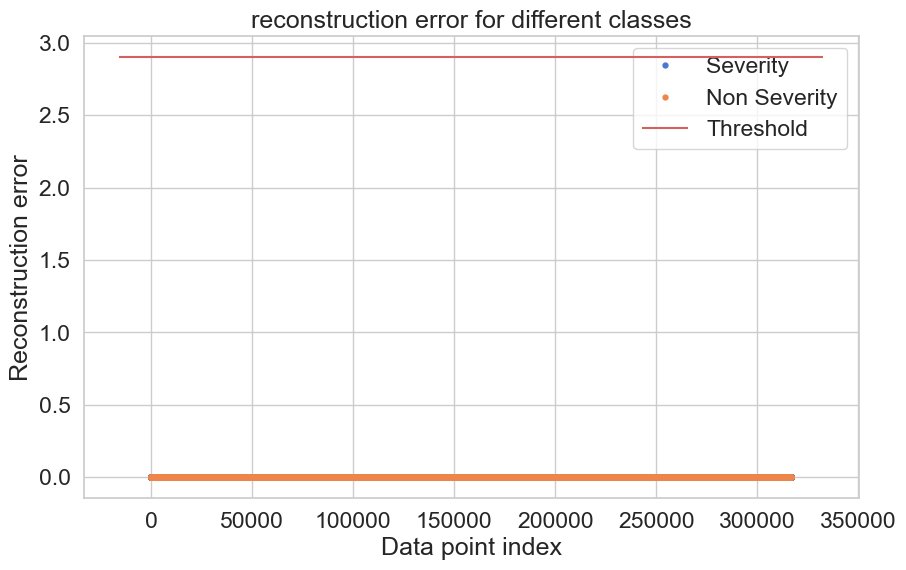

In [64]:
groups=error_df.groupby('Severity')
fig,ax=plt.subplots()
for name,group in groups:
    ax.plot(group.index,group.Reconstruction_error,marker='o',ms=3.5,linestyle='',
           label='Non Severity' if name ==1 else 'Severity')
ax.hlines(threshold,ax.get_xlim()[0],ax.get_xlim()[1],colors='r',zorder=100,label='Threshold')
ax.legend()
plt.title('reconstruction error for different classes')
plt.xlabel('Data point index')
plt.ylabel('Reconstruction error')
plt.show()

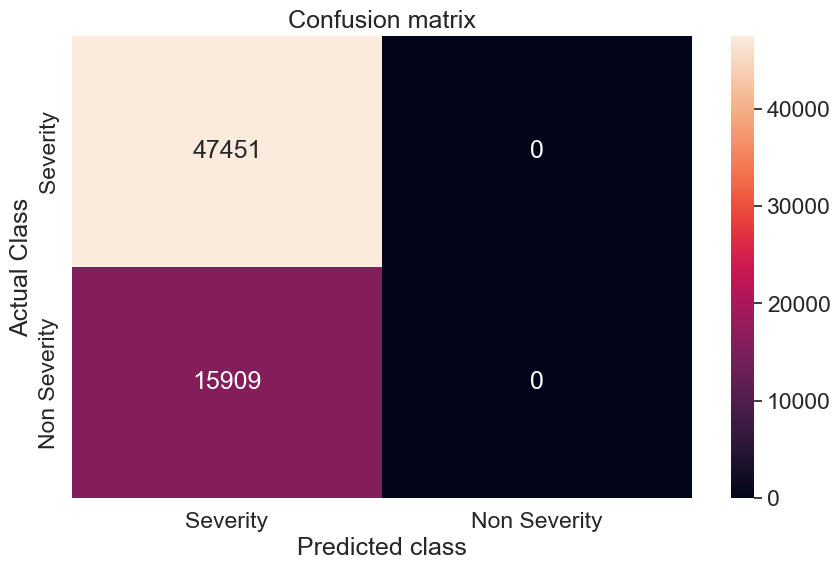

In [65]:
ypred=[1 if e>threshold else 0 for e in error_df.Reconstruction_error.values]
conf_matrix=confusion_matrix(error_df.Severity,ypred)
sns.heatmap(conf_matrix,annot=True,xticklabels=LABELS,yticklabels=LABELS,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('Actual Class')
plt.show()